<span style="color: #E6E6E6;">
<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">


# Week 5 - Fourier transforms

Instead a longer writeup, we'll just reiterate the most important parts of this week's lecture:

1. *The fourier theorem states that **any** function can be represented as an infinite sum of complex exponentials:*
$$x(n) = \sum_{n = - \infty }^{+\infty}x(n) e^{-i \omega n}$$

2. *Euler's identity states that:*

   a.  A complex exponential can be written as the sum of a cosine and a complex sine*
$$e^{i \theta} = \cos(\theta) + i \sin(\theta)$$
   b.  *Likewise, a cosine \or a sine function can be written as the following sums of complex exponentials*
$$\cos(\theta) = \frac{e^{i \theta} + e^{-i \theta}}{2}, \quad \sin(\theta) = \frac{i(e^{-i \theta} - e^{i \theta})}{2}$$

*Knowing these two things will get you through 99% of signal processing on a good day. Most of what this is used for in practical terms is the **fourier transform***

$$X(k) = \sum_{n = 0}^{N-1} x(n) e^{-i 2\pi \frac{kn}{N}} \quad \text{DFT (discrete case)}$$

$$X(k) = \int^N_{0} x(t) e^{-i 2\pi t} dt \quad \text{Continuous case (not used in this course)}$$

All of this fancy math, is really here to allow us, to take a signal **from the time domain** and transfer it **into the frequency domain**, as shown below.

<div style="text-align: center;">
  <img src="images/that_signal.png" alt="" />
</div>

So that we can extract meaningful information, such as the frequencies the signal contains, and the amplitude of each frequency.

---

The (discrete) fourier transform can intuitively be understood in the following way:
1. We input some discrete function f(n) into the fourier transform
2. The values $X(k)$ we get out are amplitudes associated with sinusoidals of specific frequencies, needed to reconstruct the signal
   1. (Rough example): getting $X(1) = 3$ means that the amplitude associated with the freqeuncy $f_k = \frac{k}{N}f_s$ is $3$ where $N$ is the number of samples and $f_s$ is the sampling rate.  
3. Important to note: due to the symmetry of the fourier transform and the nyquist rate, if you have $N$ samples of a digital signal with a sampling rate of $f_s$, you will get $\frac{N}{2}$ different frequencies from the fourier transform, with half being positive frequencies and half being negative frequencies. Typically the postive ones are just removed from plots and such. Also the maximum frequency you will get from the fourier transform is $\frac{f_s}{2}$, so you are in a way automatically insured against aliasing.

---

### Wait... about that second point?

Yeah... when you calcuate the fourier coefficients $X(k)$, **they do not directly correspond to the frequencies**. Each X(k) will be a **frequency bin**. The amount of frequency bins will be from $k = 0 \dots N-1$ so $N$ in total. 

Each of these frequency bins (which is what you get when you put in a specific value of $k$ value in $X(k)$), corresponds to a frequency equal to $\frac{k}{N}f_s$ this will increase up to $k = \frac{N}{2}$ (if N is even or $\frac{N-1}{2}$ if N is odd), after this, the frequencies will **loop** and become negative, representing the complex part of the spectrum. 

Essentailly, this means that the larger you make your sampling rate (in Hertz), the the longer there will be between the frequency bins in the frequency domain. You can alleviate this by simply taking more samples.

### And what about the negative frequencies?

As mentioned, we usually just remove those. Keep in mind when doing this, you need to mulitply the amplitudes of to positive frequencies by 2. As half the energy (amplitude) of each frequency is in the complex spectrum...

</span>



In [1]:
# As in week 4, if you encounter problems playing audio, use this workaround with Sounddevice instead...
import sounddevice as sd

def play_sine_wave_sounddevice(time_signal, sample_rate=44100):
    """
    Play a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        frequencies (list[int]): List of frequencies in the signal
        amplitudes (list[int]): List of amplitudes of each distinct frequency in the signal
        phases (list[int]): List of phases in the signal (in radians)
        duration (int): How long to play the sound
        sample_rate (int, optional): F_s, sample rate to digitally sample the signal, might remove frequencies if too low. Defaults to 44100.
    """
    # Generate sine wave
    sd.play(time_signal, samplerate=sample_rate)
    sd.wait()


<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 1 - Fourier Transform manual calculation

You are given the following discrete signal values, sampled over a duration of $2$ seconds with a sample rate $f_s = 4$

$$x(n) = [ 0,  1.21, -1,  0.21, 0, -0.21, 1, -1.21]$$

#### **1.1. What is the maximum frequency the fourier transform will be able to represent?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **1.2. What are the specific *frequency bins*, meaning for any $X(k)$ (output from the fourier transform) what specific frequency will that fourier coeffcient correspond to for this specific case?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **1.3. Look at the below calculation for the fourier coefficient corresponding to $k = 2$, and convince yourself that it makes sense**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Here we just use the formula above with the associated values, it is a bit of work though

$$X(2) = (0\cdot\exp(\frac{-(2\cdot 2\cdot i\cdot \pi)\cdot0}{8})) + 1.21\cdot\exp\frac{(-(2\cdot2\cdot i\cdot \pi)}{8}) - 1\cdot\exp(\frac{-(2\cdot2\cdot i\cdot \pi)\cdot2}{8}) + 0.21\cdot\exp(\frac{-(2\cdot2\cdot i\cdot \pi)\cdot 3}{8}) + 0\cdot\exp(\frac{-(2\cdot2\cdot i\cdot \pi)\cdot 4}{8}) - 0.21\cdot\exp(\frac{-(2\cdot2\cdot i\cdot pi)\cdot5}{8}) + 1\cdot\exp(\frac{-(2\cdot 2\cdot i \cdot \pi)\cdot6}{8}) - 1.21\cdot\exp(\frac{-(2\cdot2\cdot i \cdot \pi)\cdot 7}{8}))$$

$$ = 2$$

Which when we then normalize by the amount of samples gives us

$$X(2) = \frac{2}{8} = 0.25$$

And since we need to overlay positive and negative frequencies, we multiply by two:

$$0.25 \cdot 2  = 0.5$$

So we can say that the amplitude associated with the frequency $f_k =  \frac{k}{N} \cdot f_s = \frac{2}{8} \cdot 4 = 1$ is $0.5$ 

COPY this into maple if you just wanna see it there

bs(0*exp(-(2*2*I*Pi)*0/8) + 1.21*exp(-(2*2*I*Pi)/8) - exp(-(2*2*I*Pi)*2/8) + 0.21*exp(-(2*2*I*Pi)*3/8) + 0*exp(-(2*2*I*Pi)*4/8) - 0.21*exp(-(2*2*I*Pi)*5/8) + exp(-(2*2*I*Pi)*6/8) - 1.21*exp(-(2*2*I*Pi)*7/8))

Though you should really be using Python for this

</span>

</span>

In [ ]:
import numpy as np 
from scipy.io.wavfile import read
from IPython.display import Audio
# import sounddevice as sd # Needed to play sounds - Only use if IPython.display.Audio does not work
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.fft import fft, fftfreq # Technically used here is the fast fourier transform because it is... fast, don't convern yourself with this
import librosa
import librosa.display


In [ ]:
def generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i]) for i in range(len(frequencies))])
    return wave

def calculate_fourier_coeffcients(signal_values, sample_rate=1, v=True):
    N = len(signal_values)
    coeffs = []

    # Calculate fourier coefficient for each frequency bin
    for k in range(N):
        # Create values to sum in order to obtain fourier coefficients
        prepared_to_sum = [... for n, x_n in enumerate(signal_values)] # Multiply each signal value by the complex exponential (DFT formula)

        coeffs.append(sum(prepared_to_sum) / N) # Divide by N to normalize frequency values
        
        # Print results to the terminal
        if v:
            frequency = ...
            absolute_coefficient = ... # Get absolute value to remove imaginary parts
            print(f"The fourier coeffcient associated with frequency {frequency:.3f}: {absolute_coefficient:3f}")
            if k == N / 2:
                print("############ Frequencies Loop ############")

    return coeffs

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 2 - Calculating fourier coeffients with Python

Far easier it is to create Python functions that calculate the fourier coeffcients for us.

For each exercise, you can test your implementation in the cell below

#### **2.1. 💻 The first of the above two functions generate a sine wave based on a series on input amplitudes, phases, frequencies, sample rates and a duration of the signal. The second should calculate the fourier coefficients of said sine wave. Complete the function to calculate the fourier coefficients.**


#### **2.2. 💻 Change the values of the sample rate or frequency to see if you can make a signal whose frequencies cannot be accurately represented by the fourier transform**

#### **2.3. What do you think happens with the fourier coefficients when the signal contains a frequency that does not correspond to any of the frequency bins?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

</span>

In [ ]:
frequencies = [0.5, 2]
amplitudes = [0.5, 1]
phases = [0, 0]

sample_rate = ...
duration = ...

signal_values = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
coeffs = calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=True)

The fourier coeffcient associated with frequency 0.000: 0.307768
The fourier coeffcient associated with frequency 1.000: 0.117557
The fourier coeffcient associated with frequency 2.000: 0.501318
The fourier coeffcient associated with frequency 3.000: 0.501318
The fourier coeffcient associated with frequency 4.000: 0.117557


<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### Exercise 3 - Spectral Leakage

In practice, simply being above the nyquist rate isn't everything you need to get the lower frequencies. The amount of samples also has an effect.

In the code block below, we generate a signal with two frequencies: $F_1 = 0.25$ and $F_2 = 2$. We sample the signal with a sampling rate of $F_s = 5$ for a total of $\mathbf{1}$ **second**.

After that, we try to recover the fourier coefficients of the sampled signal.

#### **3.1. In the code below, we are not able to recover the coefficient related to the frequency $F_1 = 0.25$, instead getting all kinds of coefficients with frequencies not in the signal, why is this?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **3.2. How can you change the values of sample_rate and duration to alleviate this problem?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$


</span>

#### **3.3. What would you say is a general rule of sampling when you need to recover both very high and very low frequencies?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

</span>

In [5]:
frequencies = [0.25, 2]
amplitudes = [0.5, 1]
phases = [0, 0]

sample_rate = 5
duration = 4

signal_values = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
coeffs = calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=True)

The fourier coeffcient associated with frequency 0.000: 0.000000
The fourier coeffcient associated with frequency 0.250: 0.250000
The fourier coeffcient associated with frequency 0.500: 0.000000
The fourier coeffcient associated with frequency 0.750: 0.000000
The fourier coeffcient associated with frequency 1.000: 0.000000
The fourier coeffcient associated with frequency 1.250: 0.000000
The fourier coeffcient associated with frequency 1.500: 0.000000
The fourier coeffcient associated with frequency 1.750: 0.000000
The fourier coeffcient associated with frequency 2.000: 0.500000
The fourier coeffcient associated with frequency 2.250: 0.000000
The fourier coeffcient associated with frequency 2.500: 0.000000
############ Frequencies Loop ############
The fourier coeffcient associated with frequency 2.750: 0.000000
The fourier coeffcient associated with frequency 3.000: 0.500000
The fourier coeffcient associated with frequency 3.250: 0.000000
The fourier coeffcient associated with frequenc

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### Exercise 4 - Mathematical properties of the fourier transform

Two of the most touted properties of the fourier transform are arguably:

1. It is linear, meaning $F(aX + bY) =  a\cdot F(X) + b \cdot F(Y)$
   1. This means, adding the scaled versions of signals in the time domain, equates to adding the scaled versions of their frequencies in the frequency domain
2. Convolutions in the time domain are multiplications in the frequency domain and vice versa, often written as  $f(x) * h(k) = F(X) \cdot H(X)$
   1. You need not know what this means specifically, but we will use it more next week


#### **💻 4.1. Show this condition of linearity by plotting what happens in the frequency domain when you add two scaled sine waves together. You can expand the cell below as a 'skeleton' for your code, or you can code it from scratch yourself**

</span>

In [ ]:
# Set duration of signal
duraion = ...

# Set sample rate
sample_rate = ...

# Create time values for signal
t = ...


# Define signals...
frequency_1 = 1
sine_wave_1 = ...

frequency_2 = 2
sine_wave_2 = ...

# Create linear combination of signals
a = 2
b = 4
signal_values = ...

# Get coefficients using previous fourier coefficients function
coeffs = ...


# Plot signal in time and frequency domain
plt.plot(t,signal_values)
plt.show()

plt.stem(coeffs[:10])
plt.show()

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 5 - Fourier transforms using packages 

As ML enthusiasts, we obviously never implement ourselves what the plebs have already done for us. In this case, scipy already has a rather good FFT implementation

Using the FFT functions from scipy isn't actually **that** simple

#### **💻 5.1. Complete the sk_fourier_transform function to get the fourier coefficients (yf) and the fourier frequency bins (xf) from a given time signal. If you're having trouble, be sure to look up documentation or examples online for this. Test your implementation using the cell below.**

#### **💻 5.2. Change the plot_audio_signal function to only plot the positive frequencies, and get the wholly correct value of the amplitudes.**

#### **💻 5.3. Test the implementation in cases where there are frequencies that do not fit into frequency bins, and in cases were aliasing is present. How does the fourier spectrum look.**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

</span>

In [ ]:
def sk_fourier_transform(time_signal, duration, sample_rate):
    """
    Use scipy to calculate the fft of a time signal
    """
    
    # Frequency domain (FFT)
    N = ...
    yf = ... # Fourier coefficients
    xf = ... # Frequency values for the for the fourier coefficient bins
    
    # Get the timesteps that the signal exists over (just used for convenience, not needed for the FFT)
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

    return xf, yf, t


def plot_audio_signal(t, signal_time, signal_freq, signal_freq_bins, duration=None):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    N = len(signal_time)
    
    # idx = np.arange(N // 2) # Complete to only take positive part of spectrum

    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal_time)
    plt.title("Audio signal in time domain")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    plt.stem(signal_freq_bins, (1.0 / N * np.abs(signal_freq)))  # Normalized magnitude
    plt.title("Audio signal in frequency domain")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


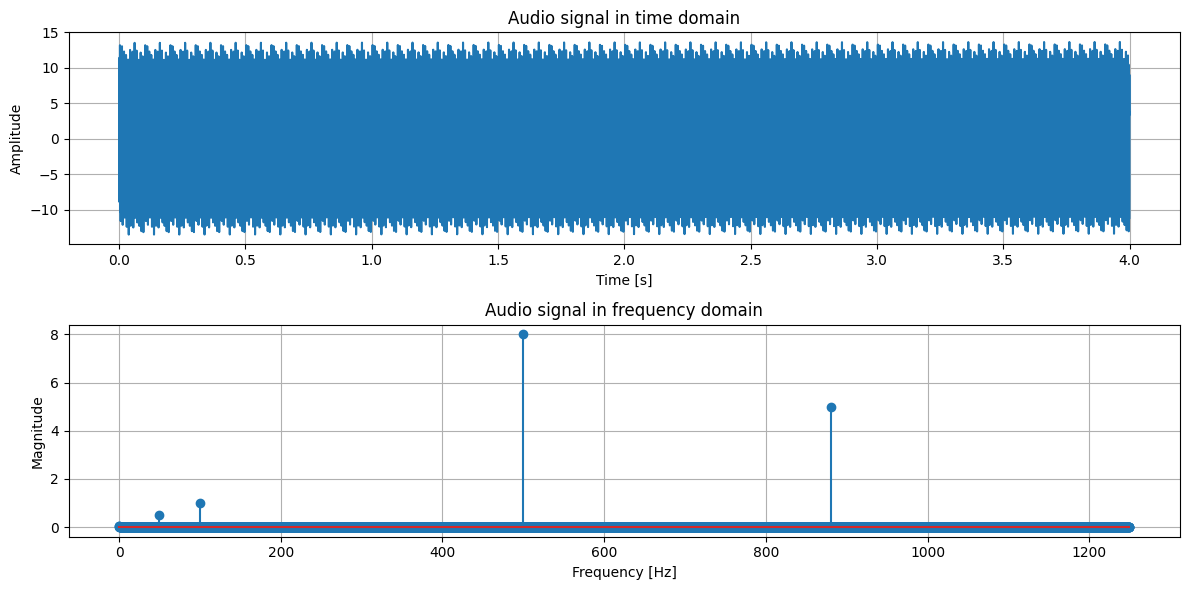

In [8]:
frequencies = [50, 100, 0.0005, 880, 7000]
amplitudes = [0.5, 1, 10, 5, 8]
phases = [0, 0, 0, 0, 0] 

sample_rate = 2500
duration = 4

time_signal = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)

xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate, positive_spectrum_only=True)

plot_audio_signal(t, time_signal, yf, xf, duration=duration)

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 6 - Noisy Signals

In real life, we never have noise-free observations, so it is useful to see how noise affects our final signal as well as the fourier spectrum. The below code introduces normal distributed noise to a given signal with the following, common model:

$$y(n) = s_n + \eta_n  \text{ }|\text{ }  \eta_n \sim \mathcal{N}(0, \sigma)$$

*Where $s_n$ is our signal of interest, $\eta_n$ is the system noise and $y(n)$ is our observed signal*

#### **💻 6.1. Complete the function `create_noised_signal` to add noise to the observed time signal**

#### **6.2. How does the fourier spectrum change when noise is introduced? How are the noise 'frequencies' expressed. Why do you think this is the case?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **6.3. Say you got an observed signal with noise as shown below, how could you approach removing the noise to only get the input frequencies out?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **6.4 Keeping in mind your idea for removing noise, how would increasing the variance of the noise impact this? Try increasing the variance of the noise and see what happens to the "noise frequencies" and the actual frequencies in the fourier spectrum**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **💻 6.5 Try changing the mean value of the noise from 0 to add a so called "DC component". What do you think this represents? How is it reflected in the fourier spectrum?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

</span>

/home/dayman/projects/Signals-And-Data-Autumn-2024/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/dayman/projects/Signals-And-Data-Autumn-2024/.venv/lib/python3.12/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/dayman/projects/Signals-And-Data-Autumn-2024/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


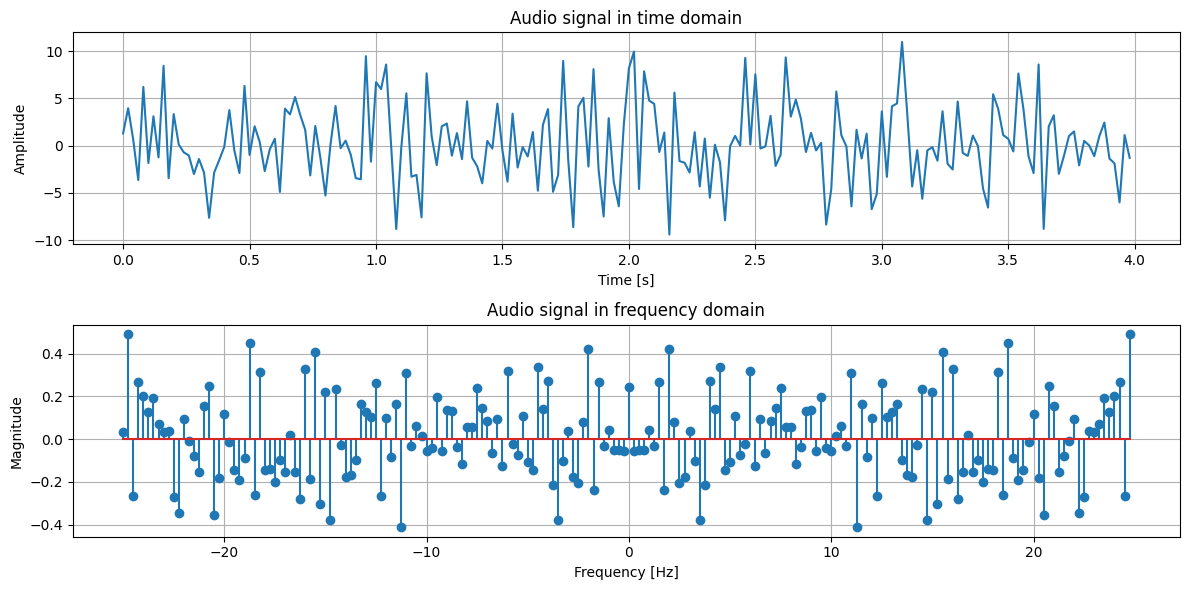

In [ ]:
def create_noised_signal(time_signal, noise_mean, noise_var):

    # Create random noise and add it to the time signal...
    NotImplementedError("Complete this function to add random noise to a time signal")

    return noised_signal

frequencies = [0.5, 2, 5]
amplitudes = [0.5, 1, 2]
phases = [0, 0, 0] 

sample_rate = 50
duration = 4

time_signal = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
noised_signal = create_noised_signal(time_signal, noise_mean=0, noise_var=4)

xf, yf, t = sk_fourier_transform(noised_signal, duration, sample_rate)

plot_audio_signal(t, noised_signal, yf, xf, duration=duration)

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### Exercise 7 - Looking at noised signals

Another really useful property of the fourier transform, is that we as humans just cannot get much information from the time spectrum in general. Below is code to plot two different noised signals in the time and frequency domain.

#### **7.1. Consider the two noised signals below. Here the exercise is mostly to realize the importance of the frequency domain, especially in tasks that require pinpointing specific frequencies in signals. In the time domain, the signals look almost identical, in the frequency domain, there is a huge and obvious difference.**

**You will see this be useful again next week during assignment 2 when you need to classify brain waves based on their frequency content.**

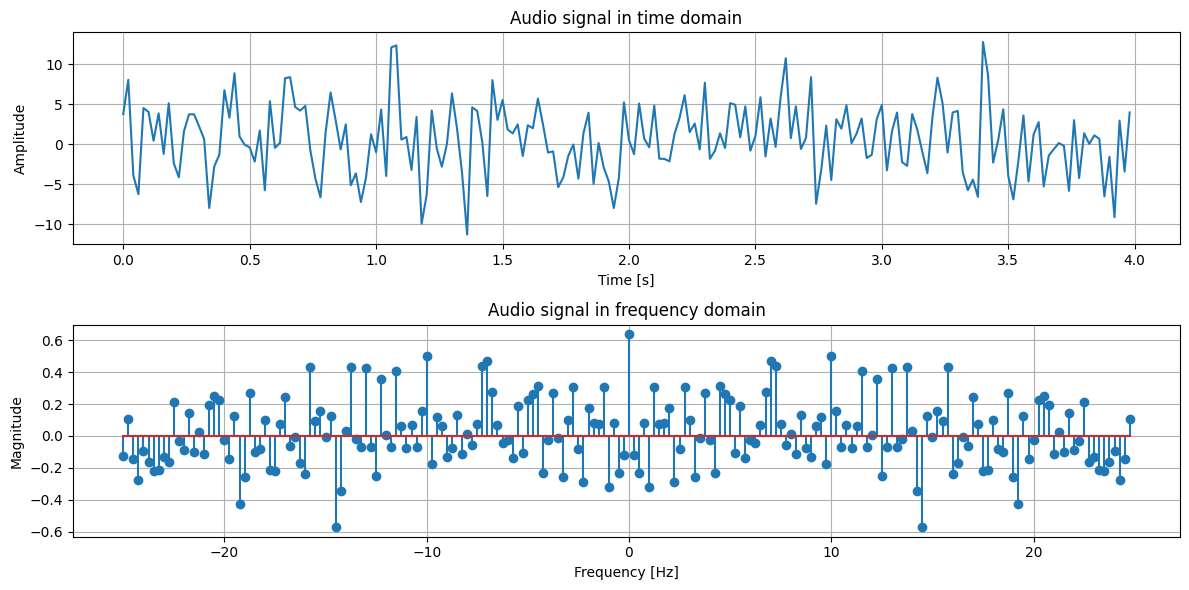

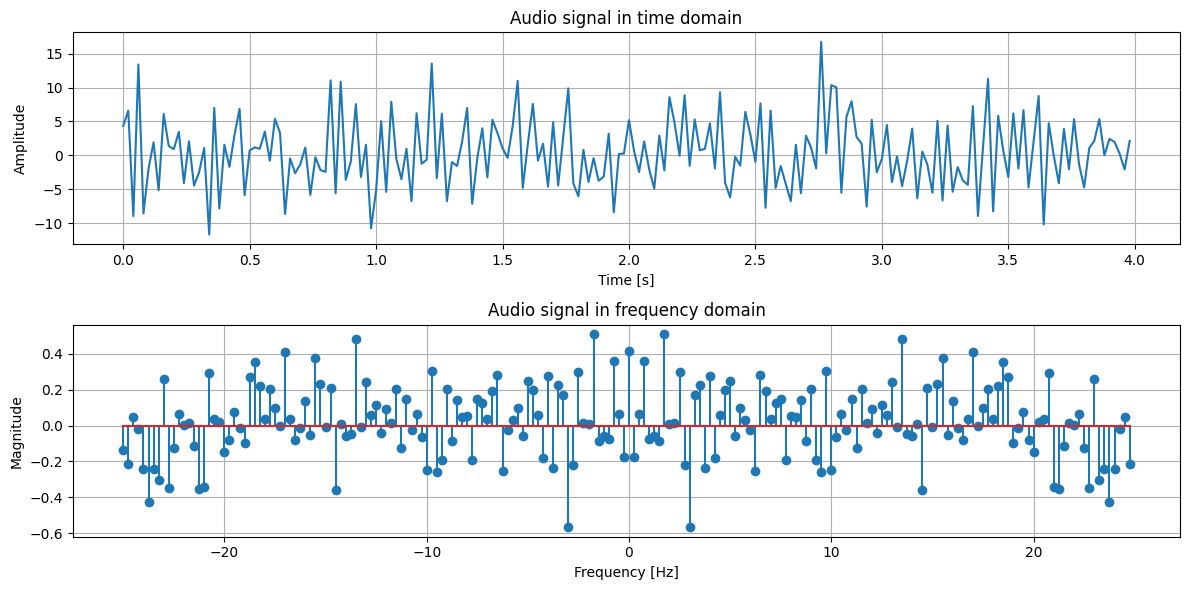

In [10]:
frequencies_signal_1 = [0.5, 2, 5]
amplitudes_signal_1 = [0.5, 1, 2]

frequencies_signal_2 = [20]
amplitudes_signal_2 = [5]

phases = [0, 0, 0] 

sample_rate = 50
duration = 4

time_signal_1 = generate_sine_wave(amplitudes_signal_1, frequencies_signal_1, phases, sample_rate, duration)
time_signal_2 = generate_sine_wave(amplitudes_signal_2, frequencies_signal_2, phases, sample_rate, duration)

mean = 0 # Change this to introduce a 'dc component' to the noise
variance = 4 # Change this to increase the prescence of the noise

noised_signal_1 = create_noised_signal(time_signal_1, mean, variance)
noised_signal_2 = create_noised_signal(time_signal_2, mean, variance)

xf_1, yf_1, t = sk_fourier_transform(noised_signal_1, duration, sample_rate)
plot_audio_signal(t, noised_signal_1, yf_1, xf_1, duration=duration)

xf_2, yf_2, t = sk_fourier_transform(noised_signal_2, duration, sample_rate)
plot_audio_signal(t, noised_signal_2, yf_2, xf_2, duration=duration)


<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### Exercise 8 - Human speech and noise

As previously mentioned, most of human speech is typically around the 90 - 3500 Hz range. It can be interesting to look at actual voice signals to see how they behave. The cell below loads one of four voice signals spelling out "S O F A"

We redefine fourier transform and plotting functions to work with loaded data

1. A clean signal where only the speech is presen
2. A signal where white noise has been added in the background
3. A signal where non-white noise in the form of a fan has been added
4. A signal where non-white noise in the form of human speech has been added

#### **8.1. 💻 Load the clean signal and see if you can recognize the difference between consonants and vowels in the time domain, what about the frequency domain?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **8.2. 💻 Load the two different noised signals. How do the different types of noise stand out from one another?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **8.3. 💻 Play with the function mix_noise to mix different types of noise with the clean signal. What combinations of noise make the clean signal the most unintelligeble from an audio standpoint?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **8.4 What combinations of noise make the clean signal the most unintelligeble when looking at just the plot of the time and frequency domain**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **8.5. In general, what types of the presented noise do you think are the most difficult to remove out when the clean signal is human speech?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

</span>

In [11]:
# Redefine fourier transform and plot functions because they don't really work when we have signals with set durations
def sk_fourier_transform(time_signal, t, sample_rate):
    """
    Use scipy to calculate the fft of a time signal
    """
    # Get the timesteps that the signal exists over
    t = np.linspace(0, time_signal.size / sample_rate, time_signal.size, endpoint=False)
    
    # Frequency domain (FFT)
    N = len(time_signal)
    yf = fft(time_signal) # Fourier coefficients
    xf = fftfreq(N, 1 / sample_rate) # Frequency values for the for the fourier coefficient bins
    
    return xf, yf, t


def plot_audio_signal(t, signal_time, signal_freq, signal_freq_bins, duration=None, max_freq=5000):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    N = len(signal_time)
    
    idx = np.arange(N // 2) # Complete to only take positive part of spectrum

    if max_freq is not None and max_freq > 0:
        idx = idx[:max_freq]


    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal_time)
    plt.title("Audio signal in time domain")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    plt.plot(signal_freq_bins[idx], (2.0 / N * np.abs(signal_freq[idx])))  # Normalized magnitude
    plt.title("Audio signal in frequency domain")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Sample rate is: 48000Hz
noise_examples/fan_noise.wav
noise_examples/talking.wav


/tmp/ipykernel_24574/2934456142.py:15: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, noise_signal = read(noise_path)


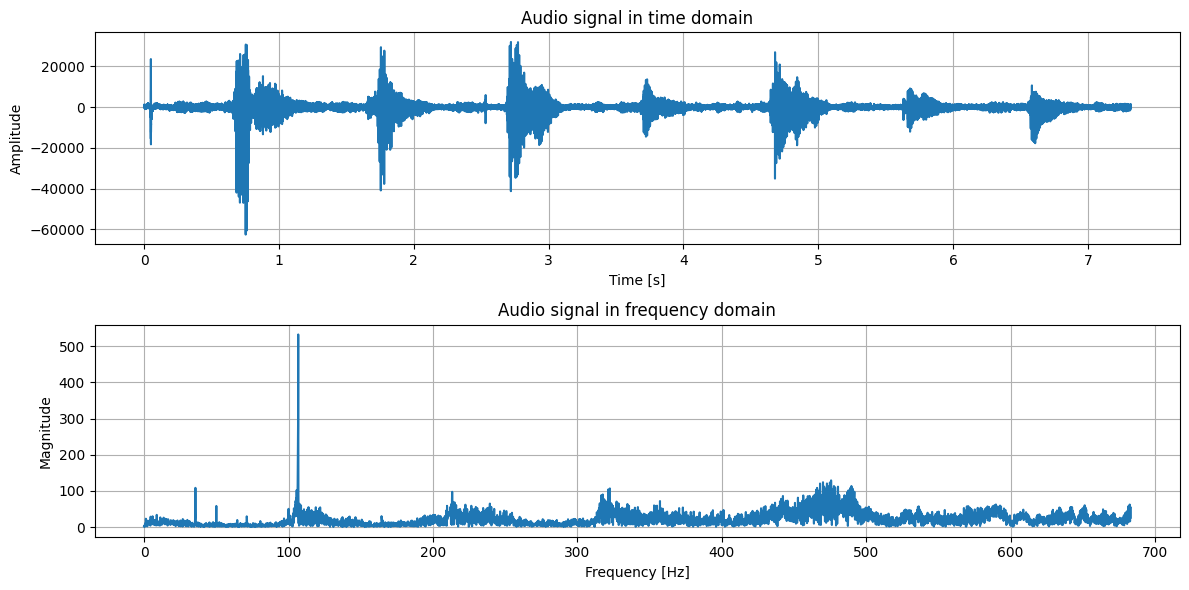

In [12]:
sofa_path = "audio/sofa.wav"
fan_noise_path = "noise_examples/fan_noise.wav"
talking_path = "noise_examples/talking.wav"

sample_rate, time_signal = read(sofa_path)
time_signal = 5 * np.array(time_signal[1:, 0],dtype=float)   # Indexed to make N odd


def mix_noise(observed_signal, noise_paths, noise_amplitudes, white_noise_variance=10, whtie_noise_mean=0, white_noise_amplitude=10):
    """
    Load and mix different white noise sources
    """
    for noise_path, noise_amplitude in zip(noise_paths, noise_amplitudes):
        print(noise_path)
        _, noise_signal = read(noise_path)
        noise_signal = np.array(noise_signal[1:, 0],dtype=float)[: len(observed_signal-1)]
        observed_signal += noise_signal * noise_amplitude

    # Create and add white noise
    white_noise = np.random.normal(loc=whtie_noise_mean, scale=white_noise_variance, size=len(time_signal))
    observed_signal += white_noise_amplitude * white_noise

    return observed_signal


print(f"Sample rate is: {sample_rate}Hz")

time_signal = mix_noise(time_signal, [fan_noise_path, talking_path], [0.05, 0.05])

# Create fourier transform, plot signal
xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate)
plot_audio_signal(t, time_signal, yf, xf, duration=duration, max_freq=5000)
Audio(time_signal,rate = sample_rate)

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### $\star$ Exercise 9 - The Short-Time Fourier transform

This is just to show what can also be done. There is something called the short time fourier transform (STFT). What this does is split a time signal into a bunch of smaller time intervals, and computes the fourier transform for each smaller interval. Laying all of these FT's in series produces what is known as a spectogram, which you may have already know from Intro to Intelligent systems

#### **9.1 Why would you do this?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">


Your answer here $\dots$

</span>

#### **9.2. How do you implement this?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

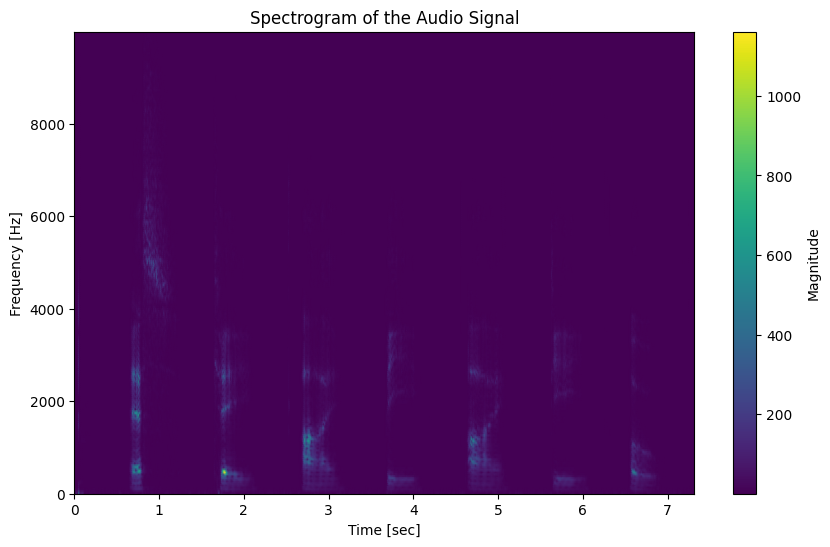

(array([ 0.,  0.,  0., ..., -1.,  1.,  0.]), 48000)

In [32]:
def load_file_and_plot_stft(file_path, max_freq=10000, audio=True, start_duration=None):
    sample_rate, time_signal = read(file_path)

    if start_duration:
        time_signal = time_signal[start_duration[0]*sample_rate: start_duration[0]*sample_rate +  start_duration[1]*sample_rate]

    # Pre-process time signal
    time_signal = np.array(time_signal[1:, 0], dtype=float)  # Indexed to make N odd

    # Perform STFT
    f, t, Zxx = stft(time_signal, fs=sample_rate, nperseg=1024,  window='hann')

    # Filter out the frequencies above the desired range
    freq_mask = f <= max_freq
    f_filtered = f[freq_mask]
    Zxx_filtered = Zxx[freq_mask, :]

    # Plot the spectrogram, here we use pcolormesh, since there is tehnically like three axes
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f_filtered, np.abs(Zxx_filtered), shading='gouraud')
    plt.title('Spectrogram of the Audio Signal')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')
    plt.show()

    return time_signal, sample_rate

# You might wanna use this function instead, it uses Librosa, and MAY give better results
def load_file_and_plot_stft_librosa(file_path, max_freq=10000, start_duration=None, n_fft=2048, hop_length=512, cmap='inferno'):
    y, sr = librosa.load(file_path, sr=None)

    if start_duration:
        start_sample = int(start_duration[0] * sr)
        end_sample = start_sample + int(start_duration[1] * sr)
        y = y[start_sample:end_sample]

    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Plot
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap=cmap)
    plt.ylim([300, max_freq])
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-Frequency Spectrogram')
    plt.tight_layout()
    plt.show()

    return y, sr



load_file_and_plot_stft('audio/sofa.wav')


**Having such a "clean" audio where there is almost no sound in many places is a big boring to look at, having for example a music clip might be more interesting...**

**Here is where the exercises end. If you want, I've collected a bunch of different examples of sound in the extra_spectograms folder that I think would be interesting to see both the spectogram of, if not also the fourier transform and the time domain signal. You can plot them using the below code if you want**

**Note, you can change the 'max_freq' if you want to see higher frequencies or want greater resolution on the lower frequencies.**

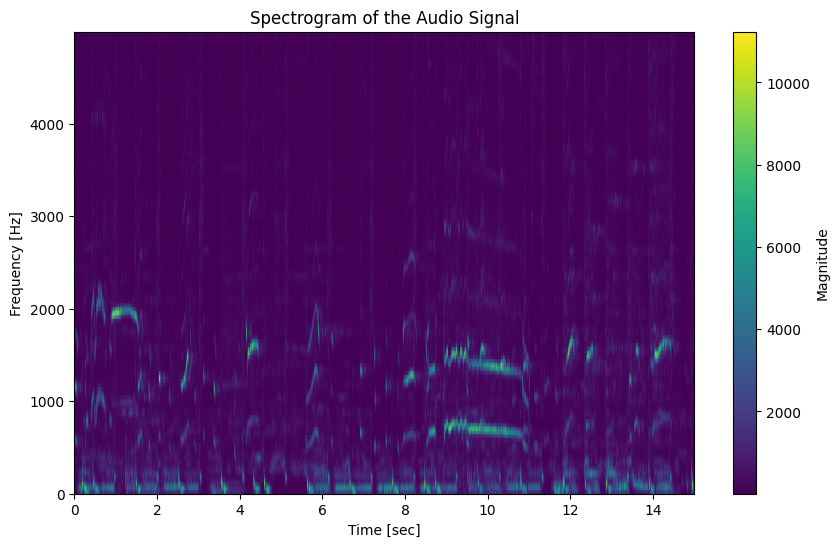

In [41]:
# Typical examples of young-people music
time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/good_music.wav", max_freq=5000, start_duration=[30, 15])
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/hutcher.wav", max_freq=5000)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/broken.wav", max_freq=5000)

# A bass singer (low pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/bass_singer.wav", max_freq=5000)

# A tenor singer (high pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/tenor_singer.wav", max_freq=5000)

# A guitar solo (medium pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/guitar_solo.wav", max_freq=5000)

# A bass solo (low pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/bass_solo.wav", max_freq=5000)

# A songbird (perhaps distortion)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/songbird.wav", max_freq=5000)

# A human songbird (????)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/human_songbird.wav", max_freq=5000)

# A bunch of people talking at the same time
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/people_talking.wav", max_freq=5000)



# An alternative way of plotting the spectogram, might be better, but does not contain correct frequencies since these are scaled by a different time unit
# xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate)
# plt.specgram(time_signal, Fs=sample_rate, NFFT=256, ) 
# plt.show()

# If you want to play the audio
Audio(time_signal,rate = sample_rate)


<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### $\star$ Exercise 10 - proving the fourier transform is linear

In exercise 4, we gave some examples that emperically "showed" that the fourier transform was linear.

### **10.1. Mathematically prove that the fourier transform (discrete case) is linear**

*Hint: Look at two different functions x and y, not different values of k*


<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">


Your answer here $\dots$

</span>


</span>

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### $\star$ Exercise 11 - The "power" of noise

#### **11.1 The variance of the noise is often referred to as the "power" of the noise, why do you supose this is?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">


Your answer here $\dots$

</span>

</span>

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### $\star$ Exercise 12 - Alice, Charlie and Bob's noise

Noise is present everywhere, but can be circumvented in quite a few cases. The following questions are mostly discussion and reflection questions, there may not be a 'true answer'

### **Case 1:**
- **Alice uses her phone to call Bob.**
- **Alice's phone signal occupies the frequency range 600MHz to 1GHz (somewhat normal for phones).**
- **Charlie is right next to Alice during her call, and is watching a Joe Rogan podcast using Wifi, which he recieves on the frequency band 2.4GHz to 5GHz.**

#### **1.1 Is the call between Alice and Bob in danger of being cut off? Why/Why not?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>


#### **1.2 Say Charlie *wants* to mess with Alice and Bob by interrupting their call. How could he go about this?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">


Your answer here $\dots$


</span>

#### **12.2. Reflect on what can cause noise in the following scenarios:**

1. **Talking in a crowded room**
2. **A phone getting wifi signal in a crowded mall**
3. **An alien race sending a signal to earth so NASA can hear it.**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **13.3. You are an engineer working for the well-known and respected military contractor, Suckheed Fartin (Skibidi Gyattin). Recently, the military has been having issues where nasty people have used radios to send mean messages to the pilots of fighter jets flying missions, this of course makes the pilots very sad, and the military wants a solution.**

**How would you, armed with your newfound knowledge of signal processing, go about solving the issue of these mean messages. For practical purposes, the pilots cannot turn off their radios or change the reciever frequencies on their radios**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>